In [2]:
import pandas as pd 
from rapidfuzz import process, fuzz
import re
import unicodedata

In [3]:
authors_institution_df = pd.read_csv('data_A_Z.csv')

authors_institution_df['share_pct'] = authors_institution_df['share_pct'].fillna(100)
authors_institution_df['institution'].value_counts().head(10)

institution
Institute of Labor Economics (IZA)                                                          952
Joint Research Centre European Commission                                                   403
Banca d'Italia                                                                              375
CESifo                                                                                      341
European Central Bank                                                                       276
Paris School of Economics                                                                   214
Banque de France                                                                            199
ifo Institut - Leibniz-Institut für Wirtschaftsforschung an der Universität München e.V.    190
Leibniz-Zentrum für Europäische Wirtschaftsforschung (ZEW)                                  190
Deutsche Bundesbank                                                                         178
Name: count, dtype: int64

isaure

In [4]:
top10_institutions = (
    authors_institution_df['institution']
    .value_counts()
    .head(10)
    .index
)

top10_institutions_df = authors_institution_df[
    authors_institution_df['institution'].isin(top10_institutions)
]

In [5]:
top10_institutions_df

,author_name,short_id,institution,share_pct,location,repec_institution_id,author_url
12,"Antipa, Pamfili",pan377,Banque de France,80%,"Paris, France",edi:bdfgvfr,https://ideas.repec.org/f/pan377.html
16,"Antman, Francisca M.",pan425,Institute of Labor Economics (IZA),5%,"Bonn, Germany",edi:izaaade,https://ideas.repec.org/f/pan425.html
58,"Antonioli, Federico",pan678,Joint Research Centre European Commission,100,"Sevilla, Spain",edi:ipjrces,https://ideas.repec.org/f/pan678.html
59,"Albanese, Giuseppe",pal552,Banca d'Italia,100,"Roma, Italy",edi:bdigvit,https://ideas.repec.org/f/pal552.html
94,"Albertazzi, Ugo",pal705,European Central Bank,50%,"Frankfurt am Main, Germany",edi:emieude,https://ideas.repec.org/f/pal705.html
...,...,...,...,...,...,...,...
29263,"Zweimuller, Josef",pzw2,Institute of Labor Economics (IZA),1%,"Bonn, Germany",edi:izaaade,https://ideas.repec.org/e/pzw2.html
29266,"Zwick, Thomas",pzw6,Leibniz-Zentrum für Europäische Wirtschaftsfor...,42%,"Mannheim, Germany",edi:zemande,https://ideas.repec.org/e/pzw6.html
29271,"Zerpa, Mariana",pze64,Institute of Labor Economics (IZA),10%,"Bonn, Germany",edi:izaaade,https://ideas.repec.org/e/pze64.html
29286,"Zylberberg, Andre",pzy2,Paris School of Economics,50%,"Paris, France",edi:eeparfr,https://ideas.repec.org/e/pzy2.html


In [6]:
A_B_df = pd.read_csv('RePEc_Full_A_B.csv')
E_Z_df = pd.read_csv('RePEc_Full_E_Z.csv')
D_df = pd.read_csv('RePEc-D-not-full.csv')
S_Y_df = pd.read_csv('RePEc-from-S-to-Y-full.csv')
J_df = pd.read_csv('RePEc_J.csv')

In [7]:
JEL_df = pd.concat(
    [A_B_df, D_df, E_Z_df, S_Y_df, J_df],
    axis=0,
    ignore_index=True
)

JEL_df = JEL_df.drop_duplicates()

In [8]:
JEL_df

,JEL Subject,Title,Author(s),Journal,Year,Type,Affiliations,URL
0,A,Working Paper Series,NaN,NaN,NaN,Working Paper,NaN,https://econpapers.repec.org/paper/
1,A,Journals,NaN,NaN,NaN,Journal Article,NaN,https://econpapers.repec.org/article/
2,A,Preparing students for careers using business ...,Nielsen Erland Hejn; Nielsen Steen,NaN,2020.0,Working Paper,Erland Hejn Nielsen: Department of Economics a...,https://econpapers.repec.org/paper/aahaarhec/2...
3,A,"Measuring Democracy - Eight indices: Polity, F...",Paldam Martin,NaN,2021.0,Working Paper,Martin Paldam: Department of Economics and Bus...,https://econpapers.repec.org/paper/aahaarhec/2...
4,A,Oeconstudiet og den ÃÂ¸konomiske faggruppe ve...,Hylleberg Svend,NaN,2023.0,Working Paper,Svend Hylleberg: Department of Economics and B...,https://econpapers.repec.org/paper/aahaarhec/2...
...,...,...,...,...,...,...,...,...
183358,K,Firmâs Credit Risk in the Presence of Market...,Xing Haipeng; Yu Yang,Risks,2018.0,Journal Article,Haipeng Xing: Department of Applied Mathematic...,https://econpapers.repec.org/article/gamjrisks...
183359,K,Overdispersed-Poisson Model in Claims Reservin...,Strascia Stefano Cavastracci; Tripodi Agostino,Risks,2018.0,Journal Article,"Stefano Cavastracci Strascia: IVASS, Prudentia...",https://econpapers.repec.org/article/gamjrisks...
183360,K,A General Framework for Portfolio Theory. Part...,Maier-Paape Stanislaus; Zhu Qiji Jim,Risks,2018.0,Journal Article,Stanislaus Maier-Paape: Institut fÃ¼r Mathemat...,https://econpapers.repec.org/article/gamjrisks...
183361,K,Calendar Spread Exchange Options Pricing with ...,Hainaut Donatien,Risks,2018.0,Journal Article,"Donatien Hainaut: Institute of Statistics, Bio...",https://econpapers.repec.org/article/gamjrisks...


In [23]:
JEL_df = (
    JEL_df
        .dropna(subset=["Author(s)"])
        .assign(Author=lambda x: x["Author(s)"].str.split(";"))
        .explode("Author")
        .assign(Author=lambda x: x["Author"].str.strip())
        .query("Author != ''")
        .rename(columns={"Author": "Author(s)"})
        .reset_index(drop=True)
)


In [9]:
sum(JEL_df["Author(s)"].isna())
JEL_df = JEL_df.dropna(subset=["Author(s)"])

JEL_df = (
    JEL_df
        .assign(**{
            "Author(s)": JEL_df["Author(s)"].str.split(";")
        })
        .explode("Author(s)")
        .assign(**{
            "Author(s)": lambda x: x["Author(s)"].str.strip()
        })
        .reset_index(drop=True)
)

In [10]:
def strip_accents(s: str) -> str:
    s = unicodedata.normalize("NFKD", s)
    return "".join(ch for ch in s if not unicodedata.combining(ch))

def normalize_whitespace(s: str) -> str:
    return re.sub(r"\s+", " ", s).strip()

def standardize_name(raw):
    """
    Returns a cleaned full-name string with consistent formatting.
    Handles:
      - casefold/lowercase
      - accents removed
      - punctuation removed
      - 'Last, First' -> 'First Last'
      - extra spaces collapsed
    """
    if pd.isna(raw):
        return ""

    s = str(raw).strip()
    if s == "":
        return ""

    s = strip_accents(s).lower()

    # Convert "Last, First Middle" -> "First Middle Last"
    if "," in s:
        parts = [p.strip() for p in s.split(",", 1)]
        if len(parts) == 2 and parts[0] and parts[1]:
            s = f"{parts[1]} {parts[0]}"

    # Replace punctuation with spaces (keeps letters/numbers)
    s = re.sub(r"[^\w\s]", " ", s)

    # Collapse whitespace
    s = normalize_whitespace(s)

    return s

def author_key(raw):
    """
    Robust matching key: "<lastname> <firstinitials>"
    Example: "John Ronald Reuel Tolkien" -> "tolkien jrr"
    """
    s = standardize_name(raw)
    if not s:
        return ""

    parts = s.split()
    if len(parts) == 1:
        return parts[0]

    last = parts[-1]
    initials = "".join(p[0] for p in parts[:-1] if p)
    return f"{last} {initials}"


In [11]:
JEL_df_std = pd.DataFrame({
    "author_std": JEL_df["Author(s)"].apply(standardize_name)
})

JEL_df_std = JEL_df.copy()

JEL_df_std["author_std"] = (
    JEL_df_std["Author(s)"]
        .astype(str)
        .apply(standardize_name)
)

In [12]:
JEL_df_std

,JEL Subject,Title,Author(s),Journal,Year,Type,Affiliations,URL,author_std
0,A,Preparing students for careers using business ...,Nielsen Erland Hejn,NaN,2020.0,Working Paper,Erland Hejn Nielsen: Department of Economics a...,https://econpapers.repec.org/paper/aahaarhec/2...,nielsen erland hejn
1,A,Preparing students for careers using business ...,Nielsen Steen,NaN,2020.0,Working Paper,Erland Hejn Nielsen: Department of Economics a...,https://econpapers.repec.org/paper/aahaarhec/2...,nielsen steen
2,A,"Measuring Democracy - Eight indices: Polity, F...",Paldam Martin,NaN,2021.0,Working Paper,Martin Paldam: Department of Economics and Bus...,https://econpapers.repec.org/paper/aahaarhec/2...,paldam martin
3,A,Oeconstudiet og den ÃÂ¸konomiske faggruppe ve...,Hylleberg Svend,NaN,2023.0,Working Paper,Svend Hylleberg: Department of Economics and B...,https://econpapers.repec.org/paper/aahaarhec/2...,hylleberg svend
4,A,Digital Tools in the Educational Environment E...,Andra Diaconescu,Research & Education,2024.0,Journal Article,Diaconescu Andra: Politehnica University of Ti...,https://econpapers.repec.org/article/aaijournl...,andra diaconescu
...,...,...,...,...,...,...,...,...,...
355589,K,A General Framework for Portfolio Theory. Part...,Zhu Qiji Jim,Risks,2018.0,Journal Article,Stanislaus Maier-Paape: Institut fÃ¼r Mathemat...,https://econpapers.repec.org/article/gamjrisks...,zhu qiji jim
355590,K,Calendar Spread Exchange Options Pricing with ...,Hainaut Donatien,Risks,2018.0,Journal Article,"Donatien Hainaut: Institute of Statistics, Bio...",https://econpapers.repec.org/article/gamjrisks...,hainaut donatien
355591,K,On Fund Mapping Regressions Applied to Segrega...,Trottier Denis-Alexandre,Risks,2018.0,Journal Article,Denis-Alexandre Trottier: FacultÃ© des Science...,https://econpapers.repec.org/article/gamjrisks...,trottier denis alexandre
355592,K,On Fund Mapping Regressions Applied to Segrega...,Godin FrÃ©dÃ©ric,Risks,2018.0,Journal Article,Denis-Alexandre Trottier: FacultÃ© des Science...,https://econpapers.repec.org/article/gamjrisks...,godin fra da ric


In [13]:
#Do fuzzy matching for the authors in df_Authors to find the match in df_A_B_Code
#Obtain matching scores 
choices = (
    top10_institutions_df["author_name"]
        .astype(str)
        .unique()
        .tolist()
)

def fuzzy_match_one(name):
    if (
        pd.isna(name)
        or str(name).strip() == ""
        or len(str(name).strip()) < 4
    ):
        return pd.Series(
            [None, 0, None],
            index=["matched_author", "match_score", "matched_index"]
        )

    match, score, idx = process.extractOne(
        str(name),
        choices,
        scorer=fuzz.WRatio
    )

    return pd.Series(
        [match, score, idx],
        index=["matched_author", "match_score", "matched_index"]
    )

JEL_df_std[["matched_author", "match_score", "matched_index"]] = (
    JEL_df_std["author_std"].apply(fuzzy_match_one)
)

In [14]:
JEL_df_std["author_name"] = JEL_df_std["matched_index"].apply(
    lambda i: choices[int(i)] if pd.notna(i) else None
)


In [15]:
JEL_df_std = JEL_df_std.dropna(subset=["matched_author"])


In [16]:
JEL_df_std[["author_std", "author_name","Author(s)", "matched_author", "match_score"]].head(100)


,author_std,author_name,Author(s),matched_author,match_score
0,nielsen erland hejn,"Gernandt, Johannes",Nielsen Erland Hejn,"Gernandt, Johannes",56.486486
1,nielsen steen,"Nielsen, Helena Skyt",Nielsen Steen,"Nielsen, Helena Skyt",69.230769
2,paldam martin,"Saldias, Martin",Paldam Martin,"Saldias, Martin",71.428571
3,hylleberg svend,"Zylberberg, Andre",Hylleberg Svend,"Zylberberg, Andre",62.500000
4,andra diaconescu,"Carta, Francesca",Andra Diaconescu,"Carta, Francesca",56.250000
...,...,...,...,...,...
95,kearns john,"Kennan, John",Kearns John,"Kennan, John",60.869565
96,warshawsky mark,"Jarocinski, Marek",Warshawsky Mark,"Jarocinski, Marek",50.000000
97,mantus john,"Dohmen, Thomas Johannes",Mantus John,"Dohmen, Thomas Johannes",57.272727
98,capretta james,"Scarpetta, Stefano",Capretta James,"Scarpetta, Stefano",56.250000


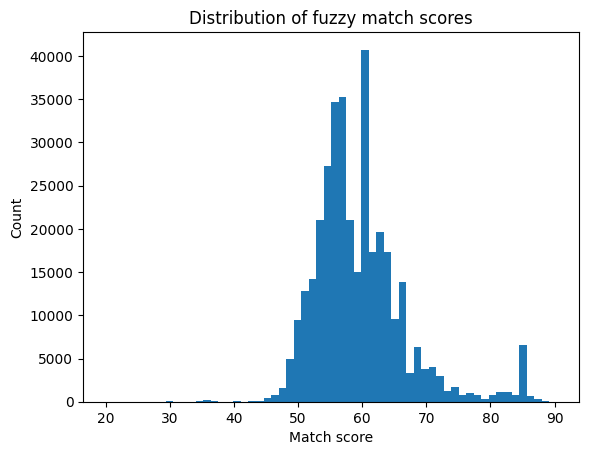

In [17]:
import matplotlib.pyplot as plt

plt.hist(JEL_df_std["match_score"].dropna(), bins=60)
plt.xlabel("Match score")
plt.ylabel("Count")
plt.title("Distribution of fuzzy match scores")
plt.show()


In [18]:
JEL_df_std_clean=JEL_df_std[JEL_df_std["match_score"]>=77]

In [19]:
JEL_df_std_clean

,JEL Subject,Title,Author(s),Journal,Year,Type,Affiliations,URL,author_std,matched_author,match_score,matched_index,author_name
21,A,Lessons for Expanding the Share of Disadvantag...,Moser Christine,Journal of Economic Perspectives,2024.0,Journal Article,NaN,https://econpapers.repec.org/article/aeajecper...,moser christine,"Moser, Christian",77.419355,1885.0,"Moser, Christian"
222,A,Size of Government and Economic Growth: A Conv...,de Pablo Valenciano Jaime,The AMFITEATRU ECONOMIC journal,2024.0,Journal Article,Juan David Garcia Gonzalez: University of Alme...,https://econpapers.repec.org/article/aesamfeco...,de pablo valenciano jaime,"de Rigo, Daniele",85.500000,728.0,"de Rigo, Daniele"
307,A,DEVELOPMENT AND HAPPINESS,de Souza JosÃÂ© Dalmo Silva,Revista de Economia Mackenzie (REM),2021.0,Journal Article,JosÃÂ© Dalmo Silva de Souza: Universidade Re...,https://econpapers.repec.org/article/aftjournl...,de souza josa a dalmo silva,"de Quinto, Alicia",85.500000,727.0,"de Quinto, Alicia"
416,A,Do political or ethnic and historical borders ...,CzeglÃ©di PÃ¡l,Society and Economy,2021.0,Journal Article,NaN,https://econpapers.repec.org/article/akasoceco...,czegla di pa l,"Bonaccorsi di Patti, Emilia",85.500000,437.0,"Bonaccorsi di Patti, Emilia"
426,A,The Two Faces of Currency â Business Success...,ÈomÃ®tcÄ Sorin,CECCAR Business Review,2022.0,Journal Article,"Sorin ÈomÃ®tcÄ: ""Ètefan cel Mare"" Universit...",https://econpapers.repec.org/article/ahdjournl...,e oma tca sorin,"Batista e Silva, Filipe",85.500000,347.0,"Batista e Silva, Filipe"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355332,K,Tail Risk and Extreme Events: Connections betw...,Febo Elisa Di,Risks,2021.0,Journal Article,"Elisa Di Febo: Department of Economics, âG.d...",https://econpapers.repec.org/article/gamjrisks...,febo elisa di,"Bonaccorsi di Patti, Emilia",85.500000,437.0,"Bonaccorsi di Patti, Emilia"
355438,K,Credit Risk Management of Property Investments...,Tajani Francesco,Risks,2021.0,Journal Article,"Marco Locurcio: Department of Civil, Environme...",https://econpapers.repec.org/article/gamjrisks...,tajani francesco,"Fasani, Francesco",78.787879,957.0,"Fasani, Francesco"
355518,K,Properties of Stochastic Arrangement Increasin...,Wei Wei,Risks,2018.0,Journal Article,"Wei Wei: Department of Mathematical Sciences, ...",https://econpapers.repec.org/article/gamjrisks...,wei wei,"Brunnschweiler, Christa",85.500000,339.0,"Brunnschweiler, Christa"
355553,K,A Robust General Multivariate Chain Ladder Method,Van Aelst Stefan,Risks,2018.0,Journal Article,"Kris Peremans: Department of Mathematics, KU L...",https://econpapers.repec.org/article/gamjrisks...,van aelst stefan,"van der Klaauw, Wilbert H",85.500000,2929.0,"van der Klaauw, Wilbert H"


In [20]:
len(JEL_df_std_clean)

13060

In [21]:
JEL_df_std = JEL_df_std.sort_values(
    by="match_score",
    ascending=False
)

JEL_df_std
JEL_df_std[JEL_df_std["match_score"] >= 77]


,JEL Subject,Title,Author(s),Journal,Year,Type,Affiliations,URL,author_std,matched_author,match_score,matched_index,author_name
316378,J,"Informal Markets, Domestic Production and Dema...",Gardes Francois,Economics Bulletin,2017.0,Journal Article,Armagan Aktuna-gunes: Paris School of Economic...,https://econpapers.repec.org/article/eblecbull...,gardes francois,"Gardes, francois",90.322581,1154.0,"Gardes, francois"
95460,D,"Informal Markets, Domestic Production and Dema...",Gardes Francois,Economics Bulletin,2017.0,Journal Article,Armagan Aktuna-gunes: Paris School of Economic...,https://econpapers.repec.org/article/eblecbull...,gardes francois,"Gardes, francois",90.322581,1154.0,"Gardes, francois"
321088,J,INFLATION AND UNEMPLOYMENT IN SOUTHEAST ASIAN ...,Malia,Regional Science Inquiry,2020.0,Journal Article,Aliasuddin: Associate Professor at the Departm...,https://econpapers.repec.org/article/hrsjournl...,malia,"Miller, Amalia Rebecca",90.000000,1983.0,"Miller, Amalia Rebecca"
308641,J,Absorption of Formal and Informal Sector Worke...,Ariani,Economic Studies journal,2024.0,Journal Article,NaN,https://econpapers.repec.org/article/baseconst...,ariani,"Mariani, Fabio",90.000000,1904.0,"Mariani, Fabio"
125087,E,INFLATION AND UNEMPLOYMENT IN SOUTHEAST ASIAN ...,Malia,Regional Science Inquiry,2020.0,Journal Article,Aliasuddin: Associate Professor at the Departm...,https://econpapers.repec.org/article/hrsjournl...,malia,"Miller, Amalia Rebecca",90.000000,1983.0,"Miller, Amalia Rebecca"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221346,E,The impact of macroeconomic conditions on long...,Geyer Johannes,The Journal of the Economics of Ageing,2025.0,Journal Article,NaN,https://econpapers.repec.org/article/eeejoecag...,geyer johannes,"Geyer, Johannes Michael",77.142857,1246.0,"Geyer, Johannes Michael"
287386,Z,Can Schools Change Religious Attitudes? Eviden...,Zierow Larissa,NaN,2022.0,Working Paper,NaN,https://econpapers.repec.org/paper/izaizadps/d...,zierow larissa,"Zierow, Larissa Viviane",77.142857,3115.0,"Zierow, Larissa Viviane"
311117,J,Identification of Key Psychosocial Safety Fact...,Sadlowska-Wrzesinska Joanna,European Research Studies Journal,2021.0,Journal Article,NaN,https://econpapers.repec.org/article/ersjournl...,sadlowska wrzesinska joanna,"Osinska, Joanna",77.142857,2082.0,"Osinska, Joanna"
191713,E,Do Youth Employment Programs Improve Labor Mar...,Robalino David,NaN,2016.0,Working Paper,NaN,https://econpapers.repec.org/paper/zbwrwirep/6...,robalino david,"Robalino, David Alejandro",77.142857,2423.0,"Robalino, David Alejandro"


In [22]:
JEL_df_std

,JEL Subject,Title,Author(s),Journal,Year,Type,Affiliations,URL,author_std,matched_author,match_score,matched_index,author_name
316378,J,"Informal Markets, Domestic Production and Dema...",Gardes Francois,Economics Bulletin,2017.0,Journal Article,Armagan Aktuna-gunes: Paris School of Economic...,https://econpapers.repec.org/article/eblecbull...,gardes francois,"Gardes, francois",90.322581,1154.0,"Gardes, francois"
95460,D,"Informal Markets, Domestic Production and Dema...",Gardes Francois,Economics Bulletin,2017.0,Journal Article,Armagan Aktuna-gunes: Paris School of Economic...,https://econpapers.repec.org/article/eblecbull...,gardes francois,"Gardes, francois",90.322581,1154.0,"Gardes, francois"
321088,J,INFLATION AND UNEMPLOYMENT IN SOUTHEAST ASIAN ...,Malia,Regional Science Inquiry,2020.0,Journal Article,Aliasuddin: Associate Professor at the Departm...,https://econpapers.repec.org/article/hrsjournl...,malia,"Miller, Amalia Rebecca",90.000000,1983.0,"Miller, Amalia Rebecca"
308641,J,Absorption of Formal and Informal Sector Worke...,Ariani,Economic Studies journal,2024.0,Journal Article,NaN,https://econpapers.repec.org/article/baseconst...,ariani,"Mariani, Fabio",90.000000,1904.0,"Mariani, Fabio"
125087,E,INFLATION AND UNEMPLOYMENT IN SOUTHEAST ASIAN ...,Malia,Regional Science Inquiry,2020.0,Journal Article,Aliasuddin: Associate Professor at the Departm...,https://econpapers.repec.org/article/hrsjournl...,malia,"Miller, Amalia Rebecca",90.000000,1983.0,"Miller, Amalia Rebecca"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,A,ÐÐÐÐ¯ÐÐÐ ÐÐ Ð¡ÐÐ¢Ð£ÐÐ¦ÐÐ¯Ð¢Ð ÐÐªÐ...,ÐÐ²Ð°Ð½Ð¾Ð²Ð° Ð¡Ð½ÐµÐ¶Ð¸Ð½Ð°,Almanac of PhD Students,2016.0,Journal Article,Ð¡Ð½ÐµÐ¶Ð¸Ð½Ð° ÐÐ²Ð°Ð½Ð¾Ð²Ð°: Ð¡ÑÐ¾Ð¿Ð°Ð½ÑÐ...,https://econpapers.repec.org/article/datalmphd...,ð ð2ð ð1 2ð3 4ð2ð ð ð1 2ðμð ð ð1 2ð,"De La Rica, Sara",22.500000,835.0,"De La Rica, Sara"
242231,Z,ÐÐÐÐÐÐÐÐªÐÐ¢ÐªÐ¢ â Ð ÐÐÐÐÐÐ¡Ð¢ ...,ÐÐ²Ð°Ð½Ð¾Ð² ÐÐ²Ð°Ð½,Scientific Research Almanac,2018.0,Journal Article,ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹ ÐÑÐµÐ½Ð¾Ð²: Ð¡ÑÐ¾Ð¿Ð°Ð½ÑÐ...,https://econpapers.repec.org/article/datalmana...,ð ð2ð ð1 2ð3 4ð2 ð ð2ð ð1 2,"De La Rica, Sara",21.600000,835.0,"De La Rica, Sara"
3893,A,ÐÐ·ÑÐ»ÐµÐ´Ð²Ð°Ð½Ðµ Ð½Ð° Ð¾ÑÐ½Ð¾ÑÐµÐ½Ð¸ÐµÑ...,ÐÐ²Ð°Ð½Ð¾Ð² ÐÐ²Ð°Ð¹Ð»Ð¾,Scientific Research Almanac,2021.0,Journal Article,ÐÑÐºÑÐ° ÐÐ°Ð½ÑÐµÐ»ÐµÐµÐ²Ð°: Ð¡ÑÐ¾Ð¿Ð°Ð½Ñ...,https://econpapers.repec.org/article/datalmana...,ð ð2ð ð1 2ð3 4ð2 ð ð2ð ð1ð ð3 4,"De La Rica, Sara",21.600000,835.0,"De La Rica, Sara"
204337,E,ÐÑÐµÐ½ÐºÐ° Ð½Ð° ÑÐ¸ÑÐºÐ°Ð»Ð½Ð°ÑÐ° Ð¿Ð¾Ð·Ð...,ÐÐ½Ð³ÐµÐ»Ð¾Ð² ÐÐ½Ð³ÐµÐ»,Economic Archive,2020.0,Journal Article,ÐÑÐµÑÐ¸ÑÐ½Ð° ÐÐµÐ½ÐºÐ¾Ð²Ð°: Ð£ÐÐ¡Ð¡ ÐÐ½...,https://econpapers.repec.org/article/datearchi...,ð ð1 2ð3ðμð ð3 4ð2 ð ð1 2ð3ðμð,"De La Rica, Sara",21.375000,835.0,"De La Rica, Sara"
